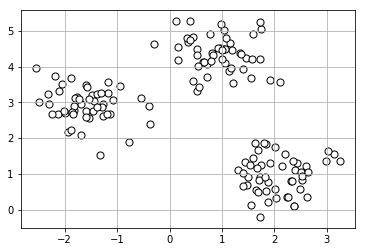

In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, random_state = 0, cluster_std = 0.5, shuffle = True)
plt.scatter(X[:, 0], X[:, 1], c = 'white', edgecolor = 'black', marker = 'o', s = 50)
plt.grid()
plt.show()

In [47]:
#Applying KMeans from scilit learn cluster module
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init= 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

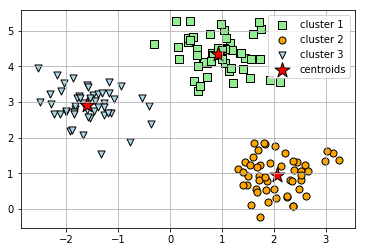

In [48]:
#Visualing k-means with cluster centroids
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor='black', label = 'cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolor='black', label = 'cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor='black', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

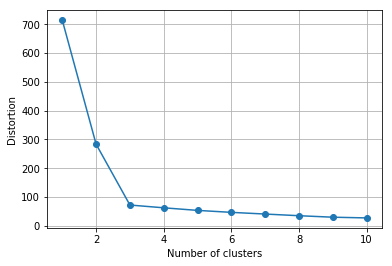

In [49]:
#Visualizing elbow plot
distortion = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortion.append(km.inertia_)
plt.plot(range(1, 11), distortion, marker = 'o')
plt.xlabel('Number of clusters') 
plt.ylabel('Distortion') 
plt.grid()
plt.show() 

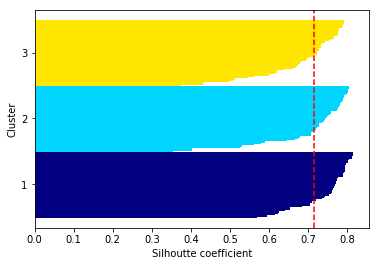

In [50]:
#Silhoutte plots
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm
km = KMeans(n_clusters=3, init = 'k-means++', n_init=10, max_iter= 300, tol = 1e-04, random_state= 0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhoutte_vals = silhouette_vals[y_km == c]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhoutte_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhoutte_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhoutte coefficient')
plt.show()

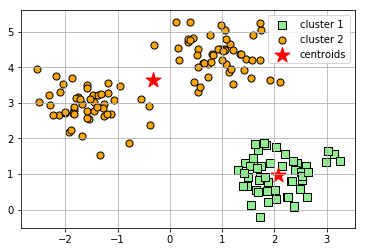

In [51]:
#Bad clustering example
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter= 300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=50, c='lightgreen', edgecolor='black', marker='s', label='cluster 1') 
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=50, c='orange', edgecolor='black', marker='o', label='cluster 2') 
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids') 
plt.legend() 
plt.grid() 
plt.show()

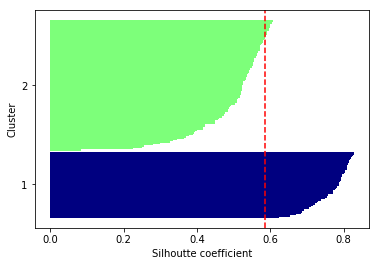

In [52]:
#Visualizing bad clustering using silhoutte plot
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhoutte_vals = silhouette_vals[y_km == c]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhoutte_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhoutte_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhoutte coefficient')
plt.show()

# Hierarchical Clustering Algorithm

In [2]:
#making random datasets
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random([5, 3])*10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [10]:
#Calculating distance matrix
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')), columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [12]:
#Applying condensed matrix
from scipy.cluster.hierarchy import linkage
row_cluster = linkage(pdist(df, metric = 'euclidean'), method = 'complete')
row_cluster

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [14]:
#Viewing the clustering results
pd.DataFrame(row_cluster, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], 
             index = ['Cluster %d'%(i + 1) for i in range(row_cluster.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
Cluster 1,0.0,4.0,3.835396,2.0
Cluster 2,1.0,2.0,4.347073,2.0
Cluster 3,3.0,5.0,5.899885,3.0
Cluster 4,6.0,7.0,8.316594,5.0


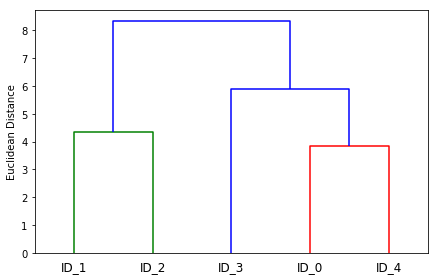

In [16]:
#Visualization via dendrograms
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_cluster, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

## Attaching dendrograms to heatmap

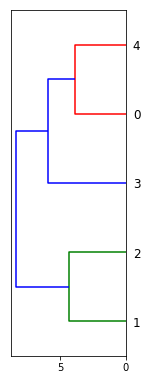

In [33]:
#Creating figures and rotating dendrograms
fig = plt.figure(figsize=(8,8), facecolor='white') 
axd = fig.add_axes([0.09,0.1,0.2,0.6]) 
row_dendr = dendrogram(row_cluster, orientation='left')

In [34]:
#reordering the data
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

In [35]:
#Constructing heatmap from reordered DataFrame and positioning it next to dendrograms
axm = fig.add_axes([0.23,0.1,0.6,0.6]) 
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r') 

In [42]:
#Modification of dendrograms
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns)) 
axm.set_yticklabels([''] + list(df_rowclust.index)) 
plt.show()

Applying agglomerative clustering via scikit learn

In [43]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(X)
print(labels)

[1 0 0 2 1]


In [44]:
acc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'complete')
label = acc.fit_predict(X)
print(label)

[0 1 1 0 0]


# DBSCAN

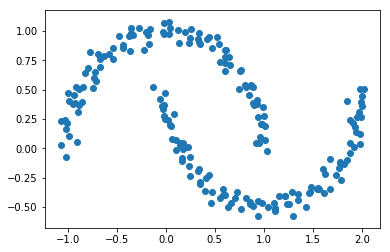

In [55]:
#Making halfmoon datasets
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

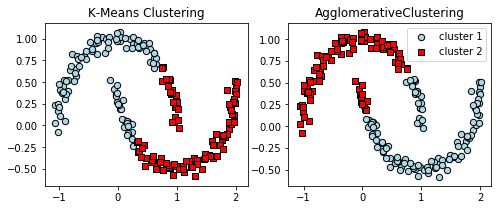

In [56]:
#Making clusters via KMeans and Agglomerative
f , (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], color = 'lightblue', s = 40, edgecolor = 'black', marker = 'o', label = 'Cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], color = 'red', s = 40, edgecolor = 'black', marker = 's', label = 'Cluster 2')
ax1.set_title('K-Means Clustering')
agc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')
y_ac = agc.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], color = 'lightblue', s = 40, edgecolor = 'black', marker = 'o', label = 'cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], color = 'red', s = 40, edgecolor = 'black', marker = 's', label = 'cluster 2')
ax2.set_title('AgglomerativeClustering')
plt.legend()
plt.show()

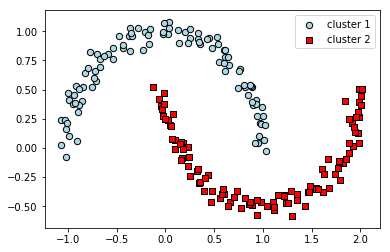

In [58]:
#DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0, 0], X[y_db==0, 1], color = 'lightblue', s = 40, edgecolor = 'black', marker = 'o', label = 'cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], color = 'red', s = 40, edgecolor = 'black', marker = 's', label = 'cluster 2')
plt.legend()
plt.show()